In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf
euclidean_dist_module = tf.load_op_library("euclidean_dist.so")
euclidean_dist = euclidean_dist_module.euclidean_dist
euclidean_dist_grad = euclidean_dist_module.euclidean_dist_grad

from tensorflow.python.framework import ops
@ops.RegisterGradient("EuclideanDist")
def _EuclideanDistGrad(op, grad):
    a = op.inputs[0]
    b = op.inputs[1]
    y = op.outputs[0]  # y = 0.5 * b / conj(a)
    xGrad, cGrad = euclidean_dist_grad(a,b,y,grad)
    return xGrad, cGrad

import time


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def RBFEuclidean(x, C, number_of_threads=1):
    """Computes distance from cluster centers defined in input C
    
    Both outdim and indim should be integers.
    """
    return -euclidean_dist(x,C,number_of_threads)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
import inspect
print(inspect.getargspec(euclidean_dist))

ArgSpec(args=['data', 'clusters', 'number_of_threads', 'name'], varargs=None, keywords=None, defaults=(None, None))


In [8]:
sess = tf.InteractiveSession()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W_fc1 = weight_variable([784, 1000])
W_fc2 = weight_variable([1000, 10])
b_fc2 = bias_variable([10])

h_rbf = RBFEuclidean(x, W_fc1,1)

y_conv = RBFEuclidean(h_rbf, W_fc2,1) + b_fc2

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())
start = time.time()
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1]})
    print("\rstep %d, training accuracy %g"%(i, train_accuracy), end="" if i%1000 else "\n")
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

elapsed = time.time()-start
print("\nTraining took {}".format(elapsed))
print("\ntest accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels}))

step 0, training accuracy 0.18
step 1000, training accuracy 0.16
step 1200, training accuracy 0.06

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
euclidean_dist_module = tf.load_op_library("euclidean_dist.so")
euclidean_dist = euclidean_dist_module.euclidean_dist
euclidean_dist_grad = euclidean_dist_module.euclidean_dist_grad

from tensorflow.python.framework import ops
@ops.RegisterGradient("EuclideanDist")
def _EuclideanDistGrad(op, grad):
    a = op.inputs[0]
    b = op.inputs[1]
    y = op.outputs[0]  # y = 0.5 * b / conj(a)
    xGrad, cGrad = euclidean_dist_grad(a,b,y,grad)
    return xGrad, cGrad

import time


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def RBFEuclidean(x, C, number_of_threads=1):
    """Computes distance from cluster centers defined in input C
    
    Both outdim and indim should be integers.
    """
    return -euclidean_dist(x,C,number_of_threads)

In [2]:
repeat_i_times = 10

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

sess = tf.InteractiveSession()

results = np.zeros([6,3])
for i in range(repeat_i_times):
    for k in range(1,4):
        x = tf.placeholder(tf.float32, shape=[None, 10**k])
        y_ = tf.placeholder(tf.float32, shape=[None, 10**k])

        W = weight_variable([10**k, 10**k])

        x_in = np.random.normal(0,1,[10**k,10**k])
        W_in = np.random.normal(0,1,[10**k,10**k])

        y_conv = RBFEuclidean(x, W)
        if True:
            start = time.time()
            y_conv.eval({x:x_in, W:W_in})
            elapsed_time = time.time()-start
            results[5,k-1] += elapsed_time/repeat_i_times
            print("\nFeed-forward took {} with GPU and {} datapoints".format(elapsed_time, 10**k))


Feed-forward took 0.09167695045471191 with GPU and 10 datapoints

Feed-forward took 0.00390625 with GPU and 100 datapoints

Feed-forward took 0.2682304382324219 with GPU and 1000 datapoints

Feed-forward took 0.004080772399902344 with GPU and 10 datapoints

Feed-forward took 0.003939628601074219 with GPU and 100 datapoints

Feed-forward took 0.2681541442871094 with GPU and 1000 datapoints

Feed-forward took 0.0038886070251464844 with GPU and 10 datapoints

Feed-forward took 0.004070758819580078 with GPU and 100 datapoints

Feed-forward took 0.2671811580657959 with GPU and 1000 datapoints

Feed-forward took 0.004770040512084961 with GPU and 10 datapoints

Feed-forward took 0.0046041011810302734 with GPU and 100 datapoints

Feed-forward took 0.2686278820037842 with GPU and 1000 datapoints

Feed-forward took 0.004425764083862305 with GPU and 10 datapoints

Feed-forward took 0.004774570465087891 with GPU and 100 datapoints

Feed-forward took 0.2672851085662842 with GPU and 1000 datapoints

In [4]:
np.save("timings.npy",results)

In [3]:
results = np.load("timings.npy")

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

import numpy as np

sess = tf.InteractiveSession()
for i in range(repeat_i_times):
    for n in range(0,5):
        for k in range(1,4):
            x = tf.placeholder(tf.float32, shape=[None, 10**k])
            y_ = tf.placeholder(tf.float32, shape=[None, 10**k])

            W = weight_variable([10**k, 10**k])

            x_in = np.random.normal(0,1,[10**k,10**k])
            W_in = np.random.normal(0,1,[10**k,10**k])

            y_conv = RBFEuclidean(x, W, 2**n)
            if True:
                start = time.time()
                y_conv.eval({x:x_in, W:W_in})
                elapsed_time = time.time()-start
                results[n,k-1] += elapsed_time/repeat_i_times
                print("\nFeed-forward took {} with {} threads and {} datapoints".format(elapsed_time, 2**n, 10**k))


Feed-forward took 0.0032329559326171875 with 1 threads and 10 datapoints

Feed-forward took 0.08902144432067871 with 1 threads and 100 datapoints

Feed-forward took 88.15529537200928 with 1 threads and 1000 datapoints

Feed-forward took 0.0038673877716064453 with 2 threads and 10 datapoints

Feed-forward took 0.0462346076965332 with 2 threads and 100 datapoints

Feed-forward took 46.80621886253357 with 2 threads and 1000 datapoints

Feed-forward took 0.0035529136657714844 with 4 threads and 10 datapoints

Feed-forward took 0.02516341209411621 with 4 threads and 100 datapoints

Feed-forward took 25.509135246276855 with 4 threads and 1000 datapoints

Feed-forward took 0.004381418228149414 with 8 threads and 10 datapoints

Feed-forward took 0.02704787254333496 with 8 threads and 100 datapoints

Feed-forward took 17.36546564102173 with 8 threads and 1000 datapoints

Feed-forward took 0.004401445388793945 with 16 threads and 10 datapoints

Feed-forward took 0.030051231384277344 with 16 thr

Populating the interactive namespace from numpy and matplotlib


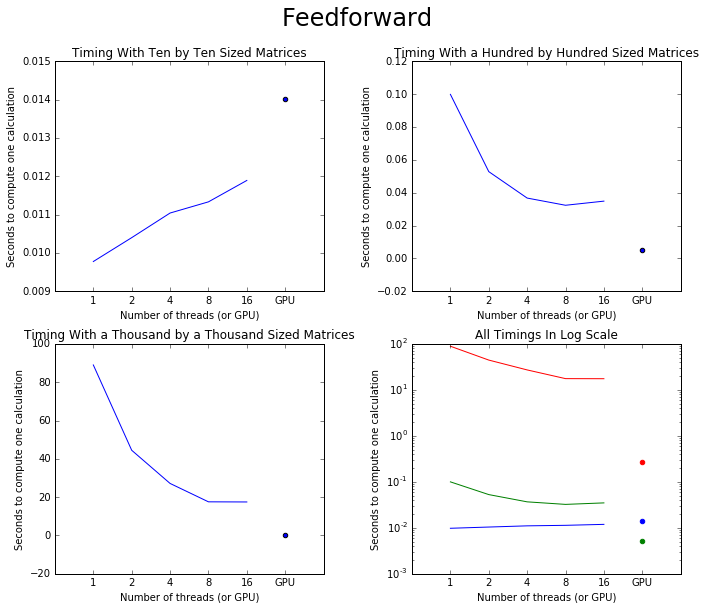

In [33]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from matplotlib import pyplot as plt

plt.figure()
plt.suptitle("Feedforward", fontsize=24, y=1.05)
plt.subplot(2,2,1)
plt.title("Timing With Ten by Ten Sized Matrices")
plt.plot(results[:-1,0])
plt.scatter([5],results[-1:,0])
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Seconds to compute one calculation")

plt.subplot(2,2,2)
plt.title("Timing With a Hundred by Hundred Sized Matrices")
plt.plot(results[:-1,1])
plt.scatter([5],results[-1:,1])
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Seconds to compute one calculation")

plt.subplot(2,2,3)
plt.title("Timing With a Thousand by a Thousand Sized Matrices")
plt.plot(results[:-1,2])
plt.scatter([5],results[-1:,2])
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Seconds to compute one calculation")

plt.subplot(2,2,4)
plt.title("All Timings In Log Scale")
plt.plot(results[:-1])
plt.scatter([5],results[-1:,0],color="blue")
plt.scatter([5],results[-1:,1], color="green")
plt.scatter([5],results[-1:,2], color="red")
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Seconds to compute one calculation")

plt.yscale("log")
plt.tight_layout()

plt.savefig("feedforward.pgf")
plt.show()
np.save("feedforwardtimings.npy",results)

In [1]:
import tensorflow as tf
euclidean_dist_module = tf.load_op_library("euclidean_dist.so")
euclidean_dist = euclidean_dist_module.euclidean_dist
euclidean_dist_grad = euclidean_dist_module.euclidean_dist_grad

from tensorflow.python.framework import ops
@ops.RegisterGradient("EuclideanDist")
def _EuclideanDistGrad(op, grad):
    a = op.inputs[0]
    b = op.inputs[1]
    y = op.outputs[0]  # y = 0.5 * b / conj(a)
    xGrad, cGrad = euclidean_dist_grad(a,b,y,grad)
    return xGrad, cGrad

import time


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def RBFEuclidean(x, C, number_of_threads=1):
    """Computes distance from cluster centers defined in input C
    
    Both outdim and indim should be integers.
    """
    return -euclidean_dist(x,C,number_of_threads)

In [2]:
repeat_i_times = 10

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

sess = tf.InteractiveSession()

results = np.zeros([6,3])
for i in range(repeat_i_times):
    for k in range(1,4):
        x = tf.placeholder(tf.float32, shape=[None, 10**k])
        y_ = tf.placeholder(tf.float32, shape=[None, 10**k])

        W = weight_variable([10**k, 10**k])

        x_in = np.random.normal(0,1,[10**k,10**k])
        W_in = np.random.normal(0,1,[10**k,10**k])

        y_conv = RBFEuclidean(x, W)
        
        grad = tf.gradients(y_conv,[x,W])
        if True:
            start = time.time()
            tf.get_default_session().run(grad, feed_dict={x:x_in, W:W_in})
            elapsed_time = time.time()-start
            results[5,k-1] += elapsed_time/repeat_i_times
            print("\nBackprop took {} with GPU and {} datapoints".format(elapsed_time, 10**k))


Backprop took 0.10253262519836426 with GPU and 10 datapoints

Backprop took 0.0055501461029052734 with GPU and 100 datapoints

Backprop took 0.45310139656066895 with GPU and 1000 datapoints

Backprop took 0.004923820495605469 with GPU and 10 datapoints

Backprop took 0.005915403366088867 with GPU and 100 datapoints

Backprop took 0.4490547180175781 with GPU and 1000 datapoints

Backprop took 0.005160808563232422 with GPU and 10 datapoints

Backprop took 0.0061187744140625 with GPU and 100 datapoints

Backprop took 0.4521031379699707 with GPU and 1000 datapoints

Backprop took 0.0056247711181640625 with GPU and 10 datapoints

Backprop took 0.00650477409362793 with GPU and 100 datapoints

Backprop took 0.4496266841888428 with GPU and 1000 datapoints

Backprop took 0.006127357482910156 with GPU and 10 datapoints

Backprop took 0.00709223747253418 with GPU and 100 datapoints

Backprop took 0.45067405700683594 with GPU and 1000 datapoints

Backprop took 0.0064504146575927734 with GPU and 1

In [5]:
np.save("timings.npy",results)

In [3]:
results = np.load("timings.npy")

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]=""

import numpy as np

sess = tf.InteractiveSession()
for i in range(repeat_i_times):
    for n in range(0,5):
        for k in range(1,4):
            x = tf.placeholder(tf.float32, shape=[None, 10**k])
            y_ = tf.placeholder(tf.float32, shape=[None, 10**k])

            W = weight_variable([10**k, 10**k])

            x_in = np.random.normal(0,1,[10**k,10**k])
            W_in = np.random.normal(0,1,[10**k,10**k])

            y_conv = RBFEuclidean(x, W, 2**n)
        
            grad = tf.gradients(y_conv,[x,W])
            if True:
                start = time.time()
                tf.get_default_session().run(grad, feed_dict={x:x_in, W:W_in})
                elapsed_time = time.time()-start
                results[n,k-1] += elapsed_time/repeat_i_times
                print("\nBackprop took {} with {} threads and {} datapoints".format(elapsed_time, 2**n, 10**k))


Backprop took 0.004094123840332031 with 1 threads and 10 datapoints

Backprop took 0.2740468978881836 with 1 threads and 100 datapoints

Backprop took 204.35610055923462 with 1 threads and 1000 datapoints

Backprop took 0.004304409027099609 with 2 threads and 10 datapoints

Backprop took 0.15582704544067383 with 2 threads and 100 datapoints

Backprop took 159.93707871437073 with 2 threads and 1000 datapoints

Backprop took 0.004886150360107422 with 4 threads and 10 datapoints

Backprop took 0.1363816261291504 with 4 threads and 100 datapoints

Backprop took 144.11951208114624 with 4 threads and 1000 datapoints

Backprop took 0.0053904056549072266 with 8 threads and 10 datapoints

Backprop took 0.13651108741760254 with 8 threads and 100 datapoints

Backprop took 133.5270013809204 with 8 threads and 1000 datapoints

Backprop took 0.006148576736450195 with 16 threads and 10 datapoints

Backprop took 0.13579940795898438 with 16 threads and 100 datapoints

Backprop took 131.45001792907715 

Populating the interactive namespace from numpy and matplotlib


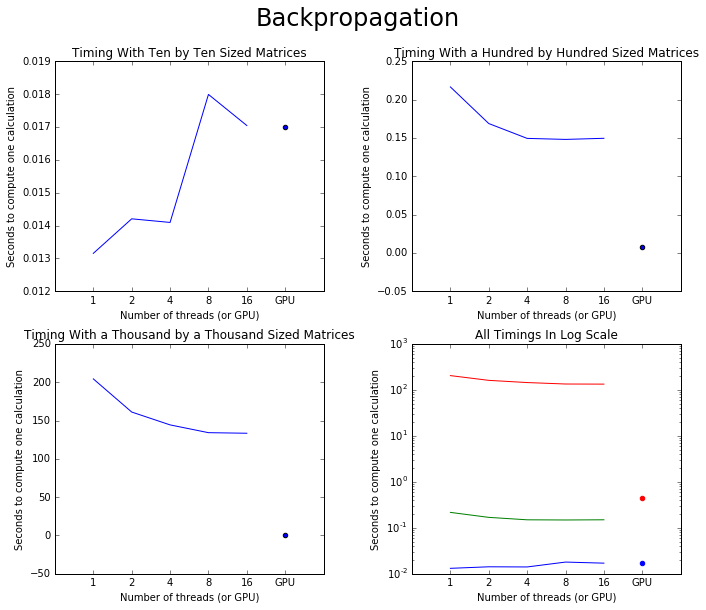

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from matplotlib import pyplot as plt

plt.figure()
plt.suptitle("Backpropagation", fontsize=24, y=1.05)
plt.subplot(2,2,1)
plt.title("Timing With Ten by Ten Sized Matrices")
plt.plot(results[:-1,0])
plt.scatter([5],results[-1:,0])
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Seconds to compute one calculation")

plt.subplot(2,2,2)
plt.title("Timing With a Hundred by Hundred Sized Matrices")
plt.plot(results[:-1,1])
plt.scatter([5],results[-1:,1])
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Seconds to compute one calculation")

plt.subplot(2,2,3)
plt.title("Timing With a Thousand by a Thousand Sized Matrices")
plt.plot(results[:-1,2])
plt.scatter([5],results[-1:,2])
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Seconds to compute one calculation")

plt.subplot(2,2,4)
plt.title("All Timings In Log Scale")
plt.plot(results[:-1])
plt.scatter([5],results[-1:,0],color="blue")
plt.scatter([5],results[-1:,1], color="green")
plt.scatter([5],results[-1:,2], color="red")
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Seconds to compute one calculation")
plt.yscale("log")

plt.tight_layout()

plt.savefig("backprop.pgf")
plt.show()
np.save("backproptimings.npy",results)

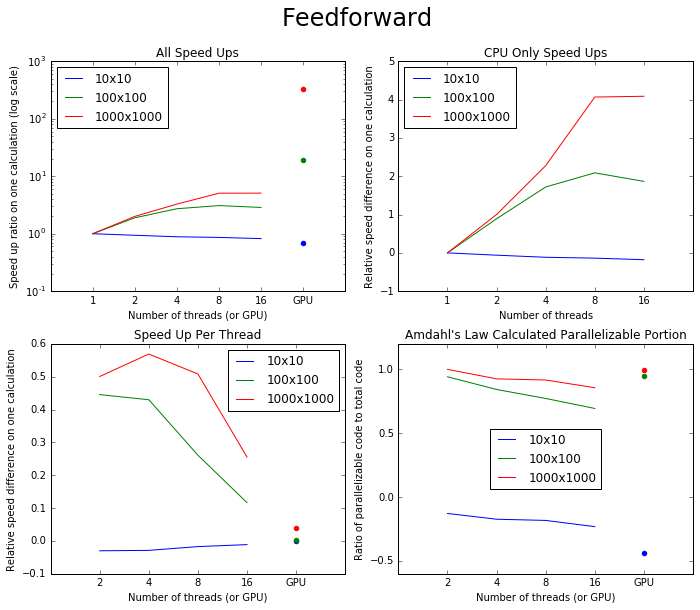

In [108]:
thread_counts = np.array([1,2,4,8,16,32*256])
timings = np.load("feedforwardtimings.npy")
results = timings[0,None]/timings
plt.figure()
plt.suptitle("Feedforward", fontsize=24, y=1.05)
plt.subplot(2,2,1)
plt.title("All Speed Ups")
plt.plot(results[:-1])
plt.scatter([5],results[-1:,0],color="blue")
plt.scatter([5],results[-1:,1], color="green")
plt.scatter([5],results[-1:,2], color="red")
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Speed up ratio on one calculation (log scale)")
plt.yscale("log")
plt.legend(["10x10","100x100","1000x1000"],loc=2)

plt.subplot(2,2,2)
plt.title("CPU Only Speed Ups")
plt.plot(results[:-1]-1)
plt.xticks(range(-1,6),["","1", "2", "4", "8", "16", ""])
plt.xlabel("Number of threads")
plt.ylabel("Relative speed difference on one calculation")
plt.legend(["10x10","100x100","1000x1000"],loc=2)

plt.subplot(2,2,3)
plt.title("Speed Up Per Thread")
plt.plot((results[1:-1]-1)/thread_counts[1:-1,None])
plt.scatter([4],(results[-1:,0]-1)/thread_counts[-1],color="blue")
plt.scatter([4],(results[-1:,1]-1)/thread_counts[-1], color="green")
plt.scatter([4],(results[-1:,2]-1)/thread_counts[-1], color="red")
plt.xticks(range(-1,6),["", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Relative speed difference on one calculation")
plt.legend(["10x10","100x100","1000x1000"],loc=1)

plt.subplot(2,2,4)
def amdahlPortion(speedup,threads):
    return threads*(speedup-1)/((threads-1)*speedup)
plt.title("Amdahl's Law Calculated Parallelizable Portion")
plt.plot(amdahlPortion(results[1:-1],thread_counts[1:-1,None]))
plt.scatter([4],amdahlPortion(results[-1:,0],thread_counts[-1]),color="blue")
plt.scatter([4],amdahlPortion(results[-1:,1],thread_counts[-1]), color="green")
plt.scatter([4],amdahlPortion(results[-1:,2],thread_counts[-1]), color="red")
plt.xticks(range(-1,6),["", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Ratio of parallelizable code to total code")
plt.legend(["10x10","100x100","1000x1000"],loc=10)

plt.tight_layout()
plt.savefig("feedforward2.pgf")
plt.show()

In [91]:
amdahlPortion(results[1:-2,1:],thread_counts[1:-2,None])

array([[ 0.94244669,  1.00064302],
       [ 0.84315011,  0.92640745],
       [ 0.77287544,  0.91731113]])

In [92]:
amdahlPortion(results[1:-2,1],thread_counts[1:-2])

array([ 0.94244669,  0.84315011,  0.77287544])

In [93]:
amdahlPortion(results[1:-2,2],thread_counts[1:-2])

array([ 1.00064302,  0.92640745,  0.91731113])

In [94]:
amdahlPortion(results[-1,1:],thread_counts[-1])

array([ 0.94731871,  0.99711002])

In [95]:
np.average(amdahlPortion(results[1:-2,1:],thread_counts[1:-2,None]))

0.9004723065515009

In [96]:
np.average(amdahlPortion(results[1:-2,1],thread_counts[1:-2]))

0.85282408014801414

In [97]:
np.average(amdahlPortion(results[1:-2,2],thread_counts[1:-2]))

0.94812053295498755

In [98]:
np.average(amdahlPortion(results[-1,1:],thread_counts[-1]))

0.97221436787683058

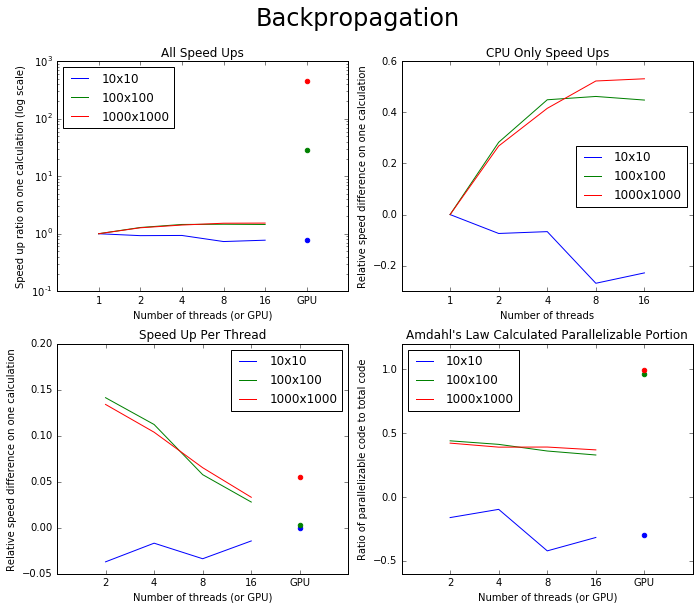

In [109]:
thread_counts = np.array([1,2,4,8,16,32*256])
timings = np.load("backproptimings.npy")
results = timings[0,None]/timings
plt.figure()
plt.suptitle("Backpropagation", fontsize=24, y=1.05)
plt.subplot(2,2,1)
plt.title("All Speed Ups")
plt.plot(results[:-1])
plt.scatter([5],results[-1:,0],color="blue")
plt.scatter([5],results[-1:,1], color="green")
plt.scatter([5],results[-1:,2], color="red")
plt.xticks(range(-1,7),["","1", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Speed up ratio on one calculation (log scale)")
plt.yscale("log")
plt.legend(["10x10","100x100","1000x1000"],loc=2)

plt.subplot(2,2,2)
plt.title("CPU Only Speed Ups")
plt.plot(results[:-1]-1)
plt.xticks(range(-1,6),["","1", "2", "4", "8", "16", ""])
plt.xlabel("Number of threads")
plt.ylabel("Relative speed difference on one calculation")
plt.legend(["10x10","100x100","1000x1000"],loc=5)

plt.subplot(2,2,3)
plt.title("Speed Up Per Thread")
plt.plot((results[1:-1]-1)/thread_counts[1:-1,None])
plt.scatter([4],(results[-1:,0]-1)/thread_counts[-1],color="blue")
plt.scatter([4],(results[-1:,1]-1)/thread_counts[-1], color="green")
plt.scatter([4],(results[-1:,2]-1)/thread_counts[-1], color="red")
plt.xticks(range(-1,6),["", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Relative speed difference on one calculation")
plt.legend(["10x10","100x100","1000x1000"],loc=1)

plt.subplot(2,2,4)
def amdahlPortion(speedup,threads):
    return threads*(speedup-1)/((threads-1)*speedup)
plt.title("Amdahl's Law Calculated Parallelizable Portion")
plt.plot(amdahlPortion(results[1:-1],thread_counts[1:-1,None]))
plt.scatter([4],amdahlPortion(results[-1:,0],thread_counts[-1]),color="blue")
plt.scatter([4],amdahlPortion(results[-1:,1],thread_counts[-1]), color="green")
plt.scatter([4],amdahlPortion(results[-1:,2],thread_counts[-1]), color="red")
plt.xticks(range(-1,6),["", "2", "4", "8", "16", "GPU", ""])
plt.xlabel("Number of threads (or GPU)")
plt.ylabel("Ratio of parallelizable code to total code")
plt.legend(["10x10","100x100","1000x1000"],loc=2)

plt.tight_layout()
plt.savefig("backprop2.pgf")
plt.show()

In [100]:
amdahlPortion(results[1:-2,1:],thread_counts[1:-2,None])

array([[ 0.44117566,  0.42318599],
       [ 0.41340681,  0.39162752],
       [ 0.36135818,  0.39241959]])

In [101]:
amdahlPortion(results[1:-2,1],thread_counts[1:-2])

array([ 0.44117566,  0.41340681,  0.36135818])

In [102]:
amdahlPortion(results[1:-2,2],thread_counts[1:-2])

array([ 0.42318599,  0.39162752,  0.39241959])

In [103]:
amdahlPortion(results[-1,1:],thread_counts[-1])

array([ 0.96523919,  0.99790718])

In [104]:
np.average(amdahlPortion(results[1:-2,1:],thread_counts[1:-2,None]))

0.40386228929710644

In [105]:
np.average(amdahlPortion(results[1:-2,1],thread_counts[1:-2]))

0.40531354866514063

In [106]:
np.average(amdahlPortion(results[1:-2,2],thread_counts[1:-2]))

0.40241102992907224

In [107]:
np.average(amdahlPortion(results[-1,1:],thread_counts[-1]))

0.98157318393468651